In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load the data with the first column as the index
raw_price_data = pd.read_csv("SP500_close_price_no_missing.csv", index_col=0)
ticker_info = pd.read_csv("SP500_ticker.csv", encoding="ISO-8859-1")

# Derive log returns using the specified formula
log_returns = np.log(raw_price_data.shift(-1) / raw_price_data).dropna()

# Standardize the log returns
scaler = StandardScaler()
standardized_returns = scaler.fit_transform(log_returns)

# Fit PCA model
pca = PCA()
pca.fit(standardized_returns)
print(log_returns)

                 MMM       ACE       ABT       ANF      ADBE       AMD  \
date                                                                     
2011-01-03 -0.001384 -0.000643  0.009366 -0.031688  0.007006  0.034806   
2011-01-04  0.000000 -0.003382  0.000000 -0.015596  0.022282  0.015837   
2011-01-05 -0.006134 -0.004365 -0.002074 -0.033434  0.001551 -0.025001   
2011-01-06  0.001044 -0.007481  0.004143  0.000747 -0.007153  0.015982   
2011-01-07  0.010613 -0.013145 -0.008930  0.012429  0.028310  0.039961   
...              ...       ...       ...       ...       ...       ...   
2014-12-24  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2014-12-25 -0.004201  0.001550  0.003277  0.005686 -0.000937  0.000000   
2014-12-26  0.002703  0.002235 -0.005467  0.016518 -0.007258  0.003766   
2014-12-29 -0.005232 -0.001719  0.001972  0.002437 -0.013992 -0.011342   
2014-12-30 -0.009208 -0.012027 -0.014773 -0.004181 -0.005487  0.015095   

                 AES       AET       

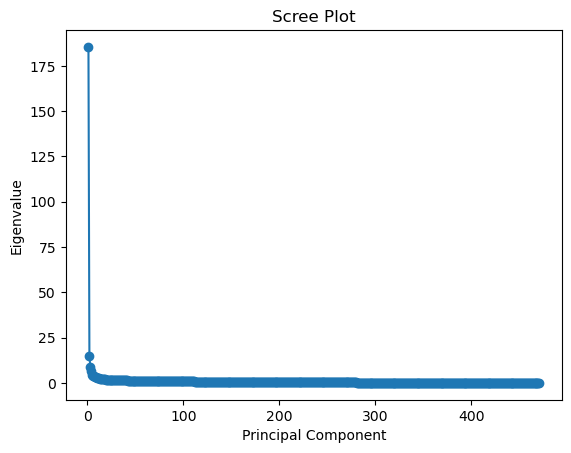

In [2]:
# Scree plot
eigenvalues = pca.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

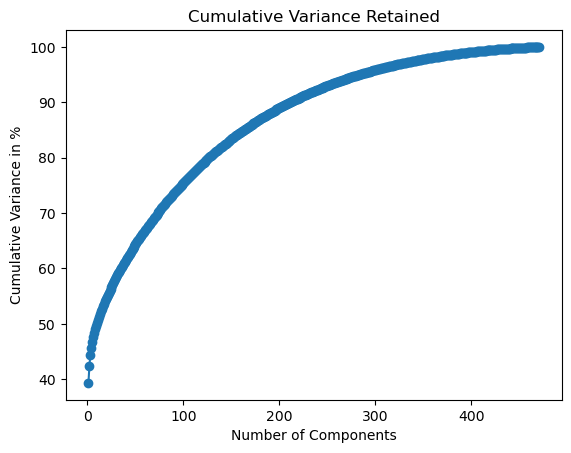

In [3]:
# Cumulative variance plot
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)*100
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance in %')
plt.show()


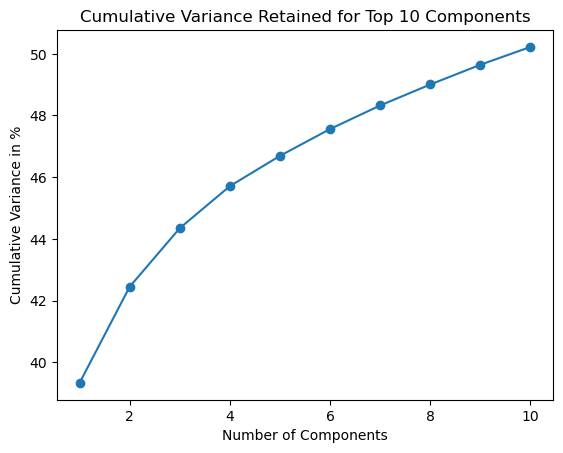

In [4]:
# Plotting the cumulative variance for the top 10 components
num_components = 10
plt.plot(range(1, num_components + 1), cumulative_variance_ratio[:num_components], marker='o')
plt.title('Cumulative Variance Retained for Top 10 Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance in %')
plt.show()

In [5]:
# Determine the number of components to retain 80% of the variance
n_components_80_percent = np.argmax(cumulative_variance_ratio >= 80) + 1
print(f"Number of components to retain 80% of the variance: {n_components_80_percent}")

Number of components to retain 80% of the variance: 127


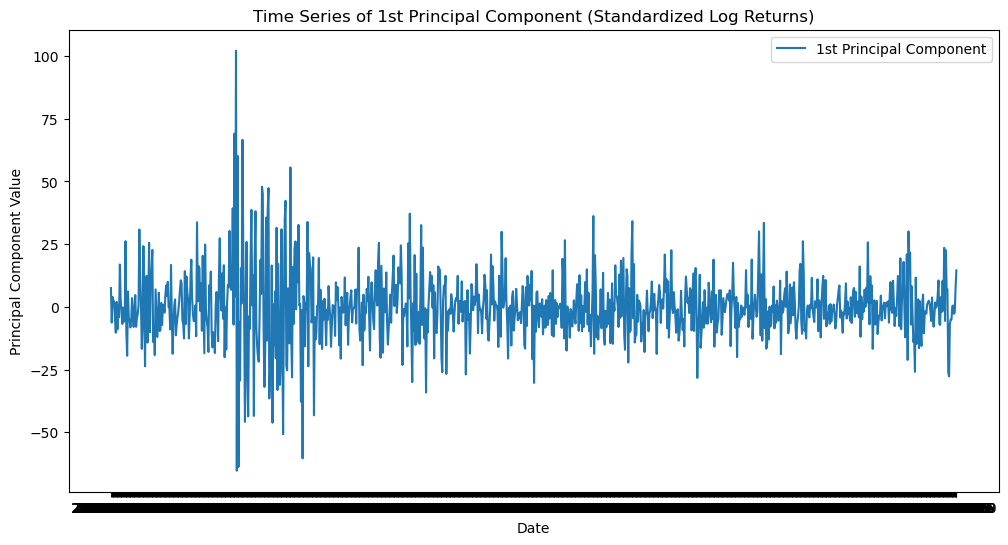

In [6]:
principal_components = pca.transform(standardized_returns)
# Extract the 1st principal component
first_principal_component = principal_components[:, 0]

# Align the date index with the dimensions of the principal component
date_index = raw_price_data.index[:-1]

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(date_index, first_principal_component, label='1st Principal Component')
plt.title('Time Series of 1st Principal Component (Standardized Log Returns)')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.show()

In [7]:
# Find the date with the lowest value for the 1st principal component
min_index = np.argmin(first_principal_component)
date_with_lowest_value = raw_price_data.index[min_index]

print(f"Date with the lowest value for the 1st principal component: {date_with_lowest_value}")

Date with the lowest value for the 1st principal component: 2011-08-08


# B2 Weight for 1st and 2nd principal Components

In [8]:
weights_1st_component = pca.components_[0]
weights_2nd_component = pca.components_[1]

# Print the weights
print("Weights for the 1st Principal Component:")
print(weights_1st_component)

print("\nWeights for the 2nd Principal Component:")
print(weights_2nd_component)

Weights for the 1st Principal Component:
[-0.06148286 -0.05612293 -0.01338367 -0.03142776 -0.04873121 -0.03739019
 -0.05189389 -0.04368021 -0.05903906 -0.05146821 -0.05518395 -0.05411716
 -0.04362366 -0.0379498  -0.05502761 -0.05357572 -0.04042444 -0.05536893
 -0.04513837 -0.03938982 -0.03666691 -0.04441632 -0.04092533 -0.05768976
 -0.05357866 -0.04201156 -0.06338442 -0.04514652 -0.03825544 -0.03280334
 -0.0522285  -0.05389427 -0.05285698 -0.05189078 -0.05046586 -0.02746048
 -0.00855835 -0.05017396 -0.05091829 -0.05338743 -0.04309722 -0.04969014
 -0.0555124  -0.04393453 -0.03207285 -0.04537758 -0.05116935 -0.03199813
 -0.04889843 -0.0251804  -0.05309729 -0.05897595 -0.04608874 -0.04877988
 -0.05732623 -0.04962918 -0.03849037 -0.05048002 -0.06121387 -0.02521246
 -0.02667146 -0.0364229  -0.06182838 -0.04243292 -0.0026297  -0.05293305
 -0.05372974 -0.04229311 -0.03708482 -0.04393482 -0.03557961 -0.04287546
 -0.05175368 -0.03206475 -0.02687835 -0.05160657 -0.03594994 -0.0544989
 -0.0475701

# B3 Ticker information with weights

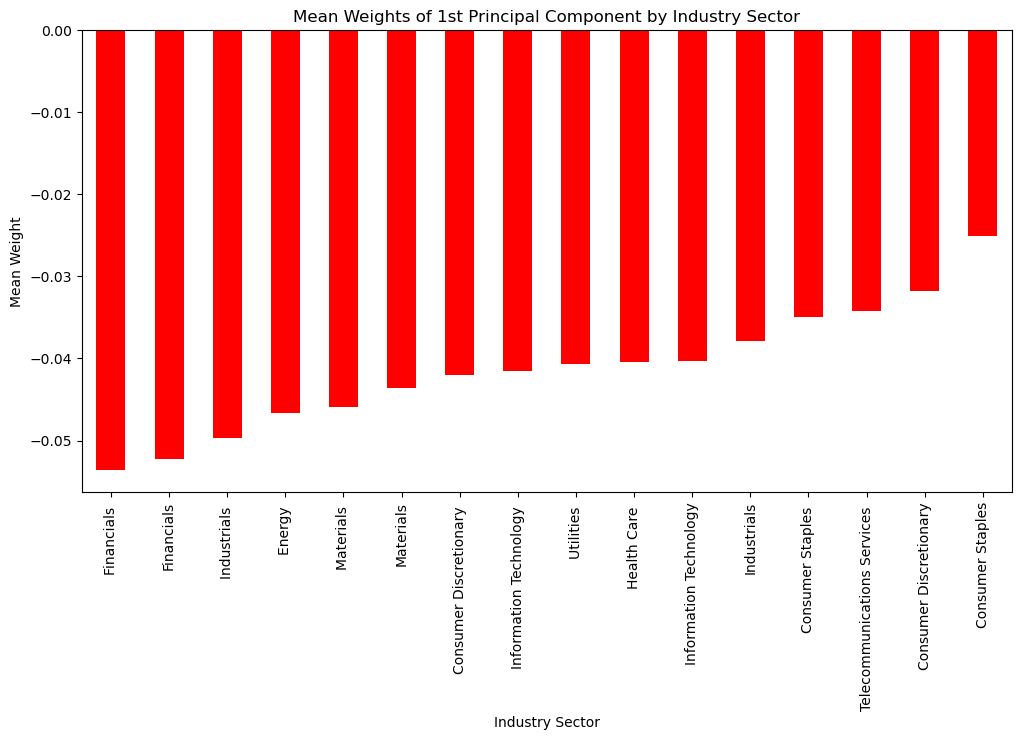

In [9]:
weights_1st_component = pca.components_[0] 
weights_df = pd.DataFrame({"Ticker": raw_price_data.columns, "Weight": weights_1st_component})
merged_df = pd.merge(ticker_info, weights_df, left_on="ticker", right_on="Ticker")

# Group by industry sector and calculate mean weight
mean_weights_by_sector = merged_df.groupby("sector")["Weight"].mean().sort_values()

# Create a bar plot
plt.figure(figsize=(12, 6))
mean_weights_by_sector.plot(kind="bar", color=np.where(mean_weights_by_sector >= 0, 'b', 'r'))
plt.title('Mean Weights of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight')
plt.show()


# B4

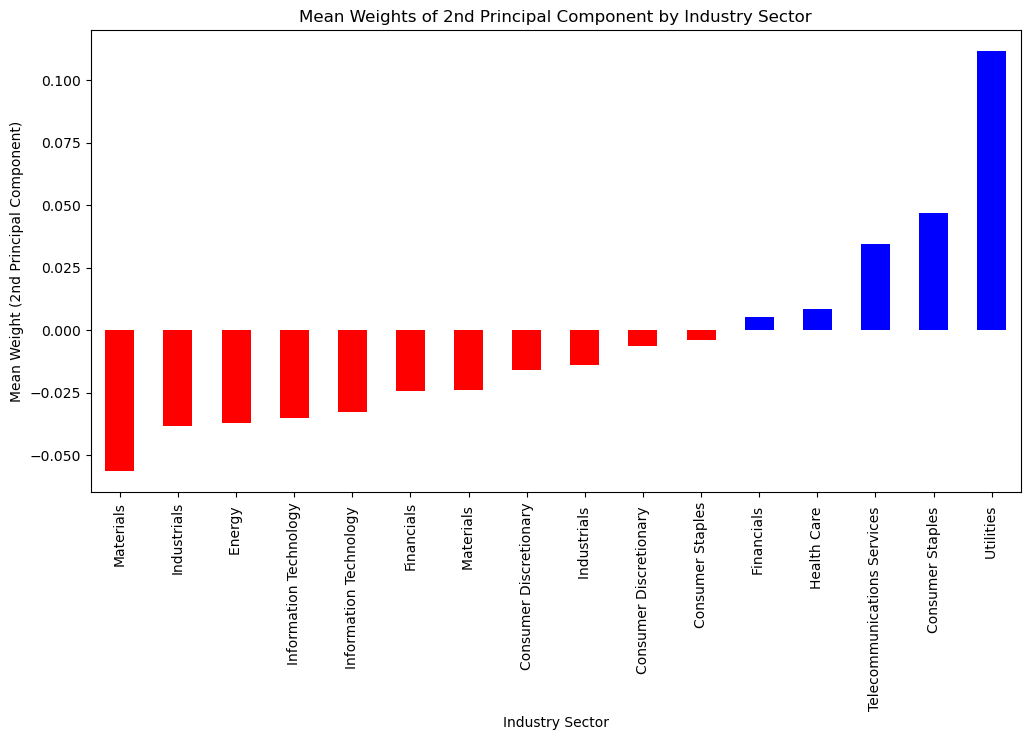

In [10]:
# Extract the weights for the 2nd principal component
weights_2nd_component = pca.components_[1]

# Merge ticker information with weights for the 2nd principal component
weights_df_2nd = pd.DataFrame({"Ticker": raw_price_data.columns, "Weight_2nd": weights_2nd_component})
merged_df_2nd = pd.merge(ticker_info, weights_df_2nd, left_on="ticker", right_on="Ticker")

# Group by industry sector and calculate mean weight for the 2nd principal component
mean_weights_by_sector_2nd = merged_df_2nd.groupby("sector")["Weight_2nd"].mean().sort_values()

# Create a bar plot for the 2nd principal component
plt.figure(figsize=(12, 6))
mean_weights_by_sector_2nd.plot(kind="bar", color=np.where(mean_weights_by_sector_2nd >= 0, 'b', 'r'))
plt.title('Mean Weights of 2nd Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight (2nd Principal Component)')
plt.show()


# B5

### The decision of whether to use the 1st or 2nd principal component for constructing a new stock index depends on the characteristics and interpretability of each component.

Generally, the 1st principal component is chosen for constructing a market index because it captures the maximum variance in the data. The 1st principal component represents the direction in the feature space along which the data varies the most. In the context of stock returns, the 1st principal component often reflects overall market trends or systematic risk. Therefore, using the 1st principal component for constructing a new stock index provides a measure that is representative of the broader market movements.

The 2nd principal component, on the other hand, captures the next highest variance orthogonal to the 1st component. It may represent sector-specific or idiosyncratic variations in stock returns. If you use the 2nd principal component for constructing a market index, you might capture more specific, sector-driven movements rather than the overall market trends.

In summary, for tracking overall market tendencies, it is generally preferable to use the 1st principal component because it encapsulates the most significant and broad market variations.

# BMI Feature Selection analysis

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('BMI.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('fatpctg', axis=1)
y = data['fatpctg']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a) Wrapper method: Backward and forward stepwise regression

# Forward stepwise regression
def forward_stepwise_regression(X, y):
    selected_features = []
    remaining_features = list(X.columns)

    while remaining_features:
        best_feature = None
        best_model = None
        best_mse = float('inf')

        for feature in remaining_features:
            model = LinearRegression()
            current_features = selected_features + [feature]
            X_subset = X[current_features]
            model.fit(X_subset, y)
            y_pred = model.predict(X_subset)
            mse = mean_squared_error(y, y_pred)

            if mse < best_mse:
                best_feature = feature
                best_model = model
                best_mse = mse

        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

    return selected_features, best_model

# Backward stepwise regression
def backward_stepwise_regression(X, y):
    selected_features = list(X.columns)
    remaining_features = list(X.columns)

    while remaining_features:
        best_feature = None
        best_model = None
        best_mse = float('inf')

        for feature in remaining_features:
            current_features = selected_features.copy()
            current_features.remove(feature)

            model = LinearRegression()
            X_subset = X[current_features]
            model.fit(X_subset, y)
            y_pred = model.predict(X_subset)
            mse = mean_squared_error(y, y_pred)

            if mse < best_mse:
                best_feature = feature
                best_model = model
                best_mse = mse

        remaining_features.remove(best_feature)

    return selected_features, best_model

# Perform forward stepwise regression
forward_selected_features, forward_model = forward_stepwise_regression(X_train, y_train)
print("Forward Selected Features:", forward_selected_features)

Forward Selected Features: ['Abdomen', 'Wrist', 'Weight', 'Biceps', 'Age', 'Neck', 'Height', 'Forearm', 'Thigh', 'Hip', 'Chest', 'Ankle', 'Knee']


In [12]:
# Perform backward stepwise regression
backward_selected_features, backward_model = backward_stepwise_regression(X_train, y_train)
print("Backward Selected Features:", backward_selected_features)

Backward Selected Features: ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


In [13]:

# b) Filter method: Correlation statistics

correlation_matrix = data.corr()
correlation_with_output = correlation_matrix['fatpctg'].abs().sort_values(ascending=False)
print("Feature Ranking based on Correlation:")
print(correlation_with_output)

Feature Ranking based on Correlation:
fatpctg    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612925
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height     0.133211
Name: fatpctg, dtype: float64


In [14]:
# c) Embedded method:
# (1) Lasso regression
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter
lasso_model.fit(X_train, y_train)
lasso_coefficients = pd.Series(lasso_model.coef_, index=X.columns).sort_values(ascending=False)
print("Lasso Coefficients:")
print(lasso_coefficients)



Lasso Coefficients:
Abdomen    0.965080
Biceps     0.278670
Forearm    0.170439
Thigh      0.145362
Age        0.056399
Ankle      0.053338
Knee       0.000000
Chest     -0.059426
Weight    -0.064379
Height    -0.064458
Hip       -0.093356
Neck      -0.393204
Wrist     -1.783823
dtype: float64


Random Forest Feature Importances:
Abdomen    0.713341
Wrist      0.029619
Neck       0.029239
Height     0.028522
Chest      0.027587
Knee       0.026667
Weight     0.024846
Hip        0.024743
Age        0.024322
Ankle      0.021214
Biceps     0.019239
Forearm    0.016315
Thigh      0.014347
dtype: float64


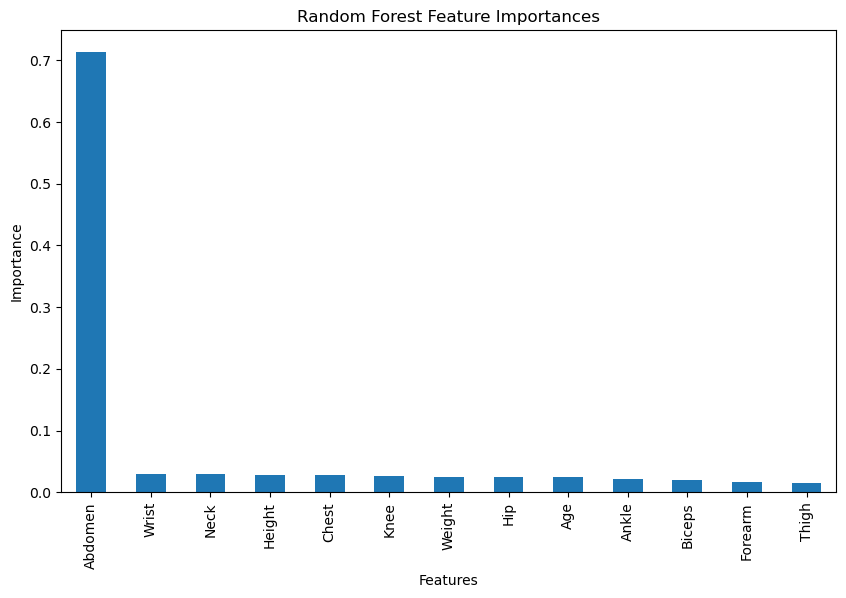

In [15]:
# (2) Random Forest (feature importance ranking)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Random Forest Feature Importances:")
print(feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

# PCA For 90 days stock prices from yfinance API

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


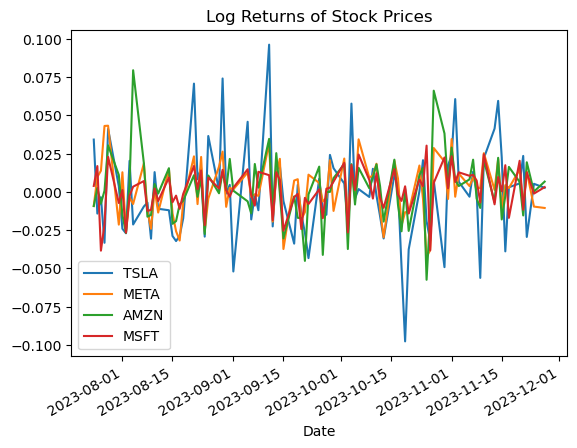

In [25]:
import yfinance as yf

# Define the stock symbols
symbol_list = ['TSLA','META', 'AMZN', 'MSFT']

# Create an empty DataFrame to store stock prices
stock_prices = pd.DataFrame()

# Fetch historical stock price data for each symbol
for symbol in symbol_list:
    try:
        data = yf.download(symbol, period="90d")['Adj Close']
        stock_prices[symbol] = data
    except Exception as e:
        print(f"Failed to download data for {symbol}: {e}")

# Ensure there are no missing values in the data
stock_prices = stock_prices.dropna()

# Calculate log returns
logg_returns = np.log(stock_prices / stock_prices.shift(1)).dropna()

# Plot raw log returns
logg_returns.plot(title='Log Returns of Stock Prices')
plt.show()

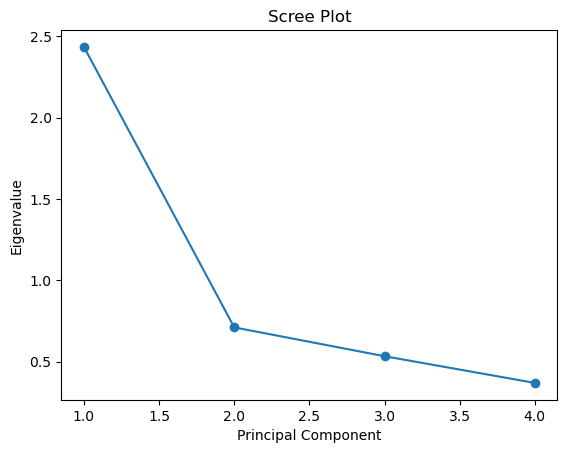

In [29]:
# Standardize the log returns
data_scaled = scaler.fit_transform(logg_returns)

pca_result = pca.fit_transform(data_scaled)

# Scree plot
eigenvalues = pca.explained_variance_
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

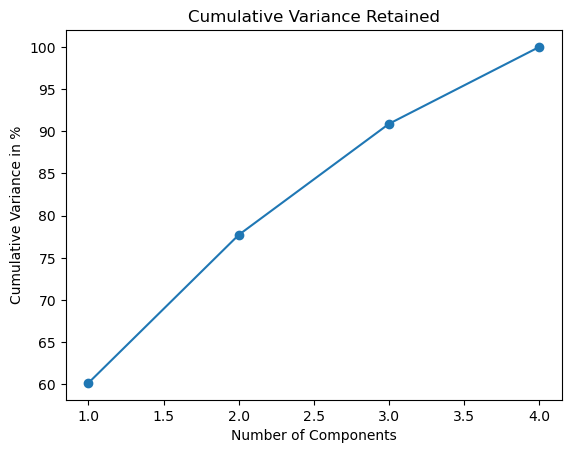

In [30]:
# Cumulative variance plot
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)*100
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance in %')
plt.show()


#  Time series

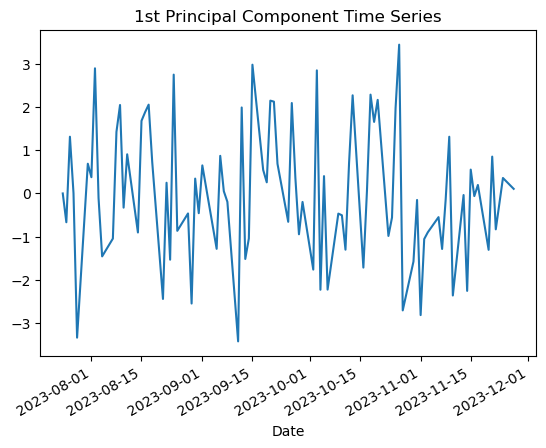

In [34]:
# Time series of the 1st principal component
stock_time_series = pd.Series(data=pca_result[:, 0], index=log_returns.index)

# Plot the time series of the 1st principal component
stock_time_series.plot(title='1st Principal Component Time Series')
plt.show()

In [36]:
# Find the date with the lowest value for the 1st principal component
ff=pca_result[:, 0]
min_index = np.argmin(ff)
date_with_lowest_value = stock_prices.index[min_index]

print(f"Date with the lowest value for the 1st principal component: {date_with_lowest_value}")

Date with the lowest value for the 1st principal component: 2023-09-08 00:00:00
